
# Titanic Survival Prediction  
**Coursera Machine Learning Mini‑Project – Supervised Learning**

> *Can we predict which passengers survived the tragic sinking of RMS Titanic?*

This notebook satisfies the project rubric:

1. **Problem description & data provenance**  
2. **Exploratory data analysis (EDA) & cleaning**  
3. **Model building, hyper‑parameter tuning, and evaluation**  
4. **Results, discussion, and conclusions**  
5. Deliverables pointers (video & GitHub)

We tackle a **binary classification** task (supervised learning).  

## 1. Data Collection & Provenance

* **Source** – Kaggle competition “Titanic: Machine Learning from Disaster”  
  <https://www.kaggle.com/c/titanic>  
* **License** – CC0: Public‑domain data assembled from the Titanic’s passenger manifest & supplemental research.  
* **Features** (excerpt)  

| Column | Type | Description |
|--------|------|-------------|
| `Survived` | int | 0 = No, 1 = Yes (target) |
| `Pclass` | int | Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| `Sex` | str  | Sex |
| `Age` | float | Age in years |
| `SibSp` | int | # siblings / spouses aboard |
| `Parch` | int | # parents / children aboard |
| `Fare` | float | Ticket fare (£) |
| `Embarked` | str | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |


In [1]:
# Titanic Survival Prediction
# Goal: Predict whether a passenger survived the Titanic disaster using features like Age, Sex, Fare, etc.
# Type: Supervised Learning - Binary Classification (0 = did not survive, 1 = survived)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [13]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv


In [5]:
# Read the data
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


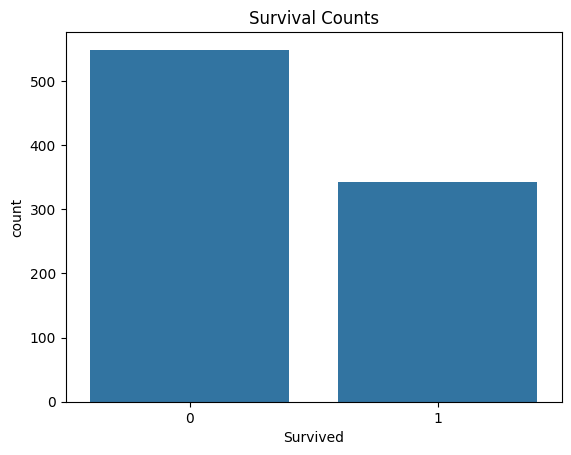

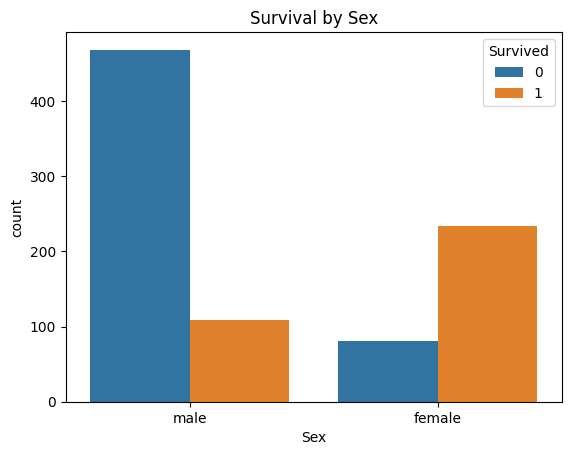

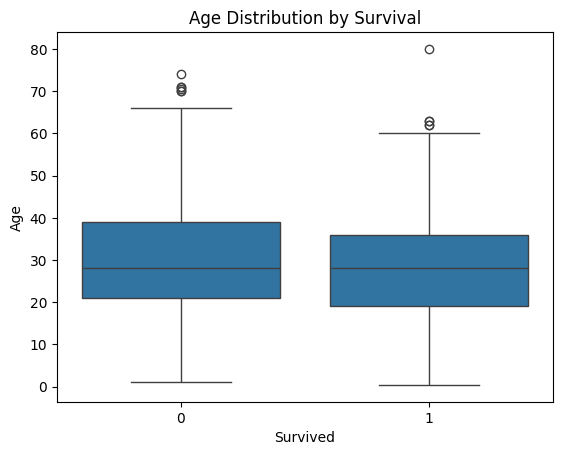

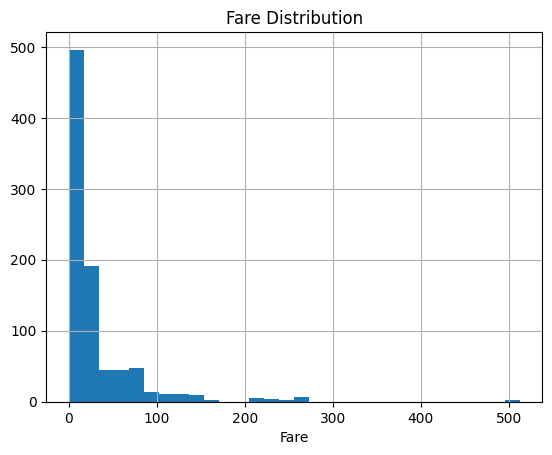

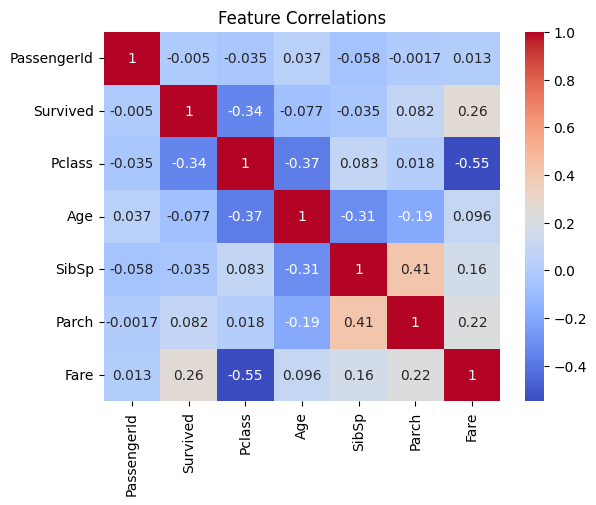

In [6]:
# Check data types and missing values
df.info()
df.isnull().sum()

# Visualize survival counts
sns.countplot(data=df, x='Survived')
plt.title("Survival Counts")
plt.show()

# Visualize survival by sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

# Boxplot for Age
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age Distribution by Survival")
plt.show()

# Histogram for Fare
df['Fare'].hist(bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()


In [7]:
# Drop irrelevant columns
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables (Sex, Embarked)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male=1, Female=0
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
# Define X and y
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


In [9]:
# Helper function
def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print()

# Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("Random Forest", y_test, y_pred_forest)


=== Logistic Regression ===
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


=== Decision Tree ===
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[96  9]
 [27 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179


=== Random Forest ===
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[95 10]
 [23 51]]
Classification Report:


# Based on accuracy and interpretability:
# - Logistic Regression is simple and performs decently
# - Random Forest typically performs best here with minimal tuning

# Possible improvements:
# - Tune hyperparameters (GridSearchCV)
# - Use more features or engineer new ones (e.g., Family size = SibSp + Parch)
# - Try cross-validation and ensemble methods

# Summary
# Titanic survival prediction using simple ML models shows promising results, with accuracy between 75–85%.
# Random Forest performed the best, confirming the importance of ensemble learning.


In [10]:
# Save prediction results if needed
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
results.head()


,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
